In [13]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'DKA_patients.csv'
dka_data = pd.read_csv(file_path)

# show the dataset
dka_data.head(5)


,subject_id,hadm_id,glucose_level,ph_level,bicarbonate_level,ketone_level,gender,age,length_of_stay,cci,ama_discharge,insurance,num_procedures,related__comorbidity,readmission
0,10005817,28661809,261.3,7.290000,14.500000,82.50,M,66,16.000000,0,0,Medicare,6.0,0,0
1,10015860,24698912,269.5,7.280000,11.833333,64.00,M,53,0.625000,0,0,Other,8.0,0,0
2,10039708,28258130,266.0,7.211429,15.029412,64.25,F,46,16.166667,0,0,Other,21.0,0,0
3,10054716,25339060,261.2,7.210000,16.500000,192.00,M,61,6.041667,0,0,Other,7.0,0,0
4,10080961,24032231,559.0,7.260000,15.777778,32.50,F,40,4.708333,0,0,Other,16.0,0,0


In [14]:
des = dka_data.describe(include='all')
print(des)

          subject_id       hadm_id  glucose_level    ph_level  \
count   9.840000e+02  9.840000e+02     984.000000  984.000000   
unique           NaN           NaN            NaN         NaN   
top              NaN           NaN            NaN         NaN   
freq             NaN           NaN            NaN         NaN   
mean    1.481302e+07  2.501465e+07     339.585677    7.220891   
std     2.918048e+06  2.851087e+06     163.798475    0.058842   
min     1.000582e+07  2.001422e+07     250.047619    6.780000   
25%     1.237560e+07  2.257387e+07     264.972222    7.197143   
50%     1.469148e+07  2.499419e+07     284.816667    7.235000   
75%     1.724561e+07  2.752873e+07     336.041667    7.260000   
max     1.997049e+07  2.999258e+07    1716.500000    7.290000   

        bicarbonate_level  ketone_level gender         age  length_of_stay  \
count          984.000000    984.000000    984  984.000000      984.000000   
unique                NaN           NaN      2         NaN     

In [15]:
# Check missing values
missing_values = dka_data.isnull().sum()
print(missing_values)

subject_id               0
hadm_id                  0
glucose_level            0
ph_level                 0
bicarbonate_level        0
ketone_level             0
gender                   0
age                      0
length_of_stay           0
cci                      0
ama_discharge            0
insurance                0
num_procedures          40
related__comorbidity     0
readmission              0
dtype: int64


In [16]:
# Impute missing values using the median for numeric columns only
dka_data_imputed = dka_data.fillna(dka_data.select_dtypes(include='number').median())

# other strategy
# dka_data_imputed = dka_data.fillna(dka_data.select_dtypes(include='number').mean())

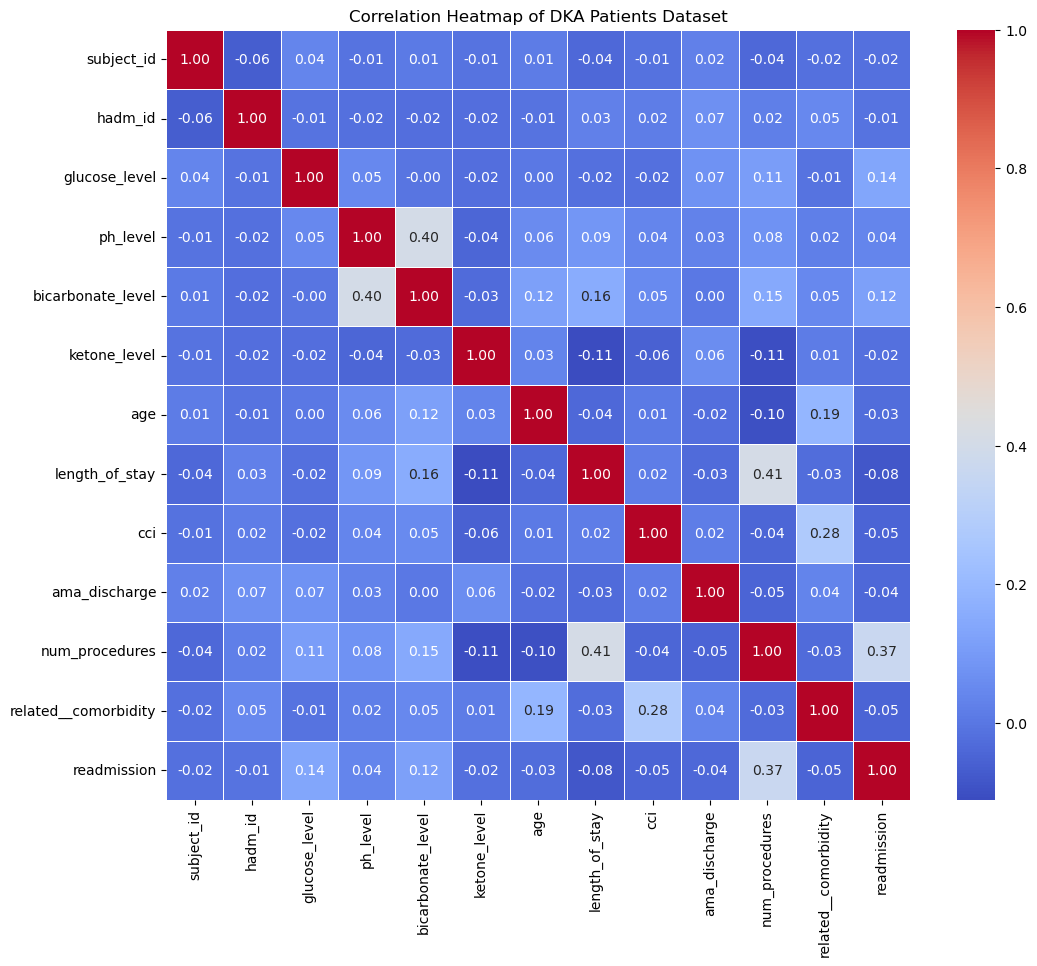

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = dka_data.select_dtypes(include='number').corr()

# Display the correlation matrix
# print(correlation_matrix)

# Visualize the correlation with a heatmap chart
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of DKA Patients Dataset")
plt.show()


Accuracy: 0.74
Confusion Matrix:
[[133   3]
 [ 48  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       136
           1       0.81      0.21      0.34        61

    accuracy                           0.74       197
   macro avg       0.77      0.60      0.59       197
weighted avg       0.76      0.74      0.68       197



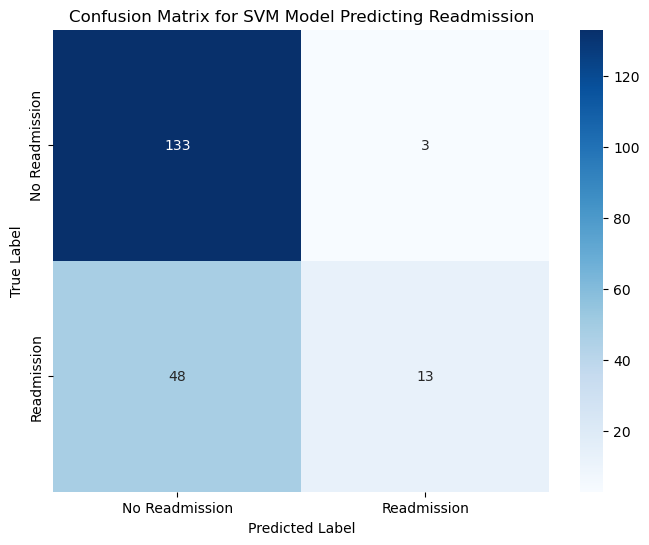

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# SVM model without dataset balancing

# Data Preparation
# Separate features and target variable
X = dka_data_imputed.drop(columns=['readmission'])
y = dka_data_imputed['readmission']

# Convert categorical variables using LabelEncoder
label_encoder = LabelEncoder()
X['gender'] = label_encoder.fit_transform(X['gender'])
X['insurance'] = label_encoder.fit_transform(X['insurance'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
# Initialize and train the SVM classifier
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Model Evaluation
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)
y_pred_prob = svm_classifier.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['No Readmission', 'Readmission'], yticklabels=['No Readmission', 'Readmission'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model Predicting Readmission')
plt.show()


Accuracy (Balanced): 0.73
Classification Report (Balanced):
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       142
           1       0.73      0.71      0.72       135

    accuracy                           0.73       277
   macro avg       0.73      0.73      0.73       277
weighted avg       0.73      0.73      0.73       277



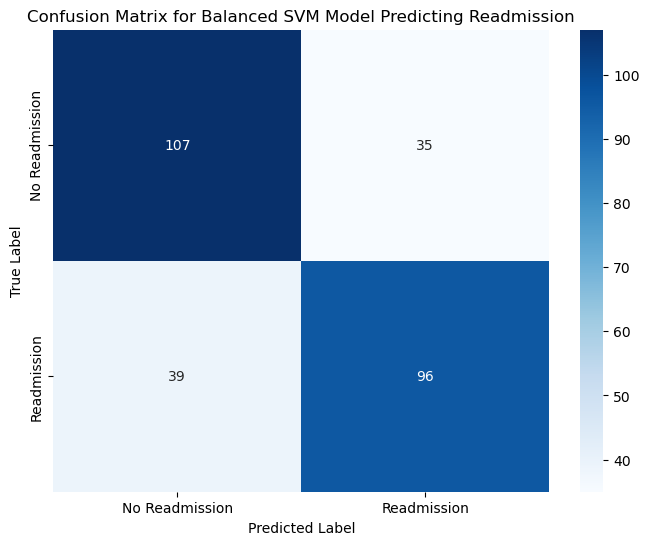

In [23]:
from sklearn.utils import resample

# Balance dataset
# Separate majority and minority classes
dka_majority = dka_data_imputed[dka_data_imputed['readmission'] == 0]
dka_minority = dka_data_imputed[dka_data_imputed['readmission'] == 1]

# Upsample the minority class
dka_minority_upsampled = resample(dka_minority, replace=True, n_samples=len(dka_majority), random_state=42)

# Combine majority class with upsampled minority class
dka_balanced = pd.concat([dka_majority, dka_minority_upsampled])

# Shuffle the balanced dataset
dka_balanced = dka_balanced.sample(frac=1, random_state=42)

# Separate features and target variable again
X_balanced = dka_balanced.drop(columns=['readmission'])
y_balanced = dka_balanced['readmission']

# Convert categorical variables using LabelEncoder
X_balanced['gender'] = label_encoder.fit_transform(X_balanced['gender'])
X_balanced['insurance'] = label_encoder.fit_transform(X_balanced['insurance'])

# Split the balanced data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Standardize the features
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_balanced_scaled = scaler.transform(X_test_balanced)

# Train the SVM classifier again on the balanced dataset
svm_classifier_balanced = SVC(probability=True, random_state=42)
svm_classifier_balanced.fit(X_train_balanced_scaled, y_train_balanced)

# Evaluate the model
y_pred_balanced = svm_classifier_balanced.predict(X_test_balanced_scaled)
y_pred_prob_balanced = svm_classifier_balanced.predict_proba(X_test_balanced_scaled)[:, 1]

# Evaluate the model using accuracy, confusion matrix, and classification report
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

print(f"Accuracy (Balanced): {accuracy_balanced:.2f}")
print("Classification Report (Balanced):")
print(class_report_balanced)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, cmap='Blues', fmt='g', xticklabels=['No Readmission', 'Readmission'], yticklabels=['No Readmission', 'Readmission'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Balanced SVM Model Predicting Readmission')
plt.show()


In [20]:
from sklearn.feature_selection import RFE

# Initialize an SVM model for RFE
svm_for_rfe = SVC(kernel="linear", random_state=42)

# Use RFE to find feature importance
rfe = RFE(estimator=svm_for_rfe, n_features_to_select=1, step=1)
rfe.fit(X_train_balanced_scaled, y_train_balanced)

# Create a DataFrame with feature ranking
feature_ranking = pd.DataFrame({
    'Feature': X_balanced.columns,
    'Rank': rfe.ranking_
}).sort_values(by='Rank')

print(feature_ranking)

                 Feature  Rank
12        num_procedures     1
8         length_of_stay     2
2          glucose_level     3
4      bicarbonate_level     4
3               ph_level     5
13  related__comorbidity     6
6                 gender     7
7                    age     8
11             insurance     9
5           ketone_level    10
10         ama_discharge    11
0             subject_id    12
1                hadm_id    13
9                    cci    14
